### Description : This program attempts to optimize  users portfolio using the efficient frontier

In [1]:
# Import the python libraries 
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import quandl

C:\Users\JAYACHANDRAN JM\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#Getting the stock symbols
stocks  = ['NSE/SBIN','NSE/ZEEL','NSE/BAJFINANCE','NSE/TATAMOTORS','NSE/JSWSTEEL']

In [3]:
#assign weights to the stocks
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [4]:
#start date
startdate = '2011-01-01'

In [5]:
#enddate 
enddate = datetime.today().strftime('%Y-%m-%d')
enddate

'2020-07-08'

In [6]:
#Creating a dataframe to store the Close prices of the stocks
df = pd.DataFrame()

#Store the adjusted close pprices of the stocks into the df
for i in stocks:
    df[i] = web.DataReader(i,'quandl', start = startdate, end = enddate,api_key='zpDJSkRgFzuCTxiDt8xi')['Close']

In [7]:
#visualizing the data
df


,NSE/SBIN,NSE/ZEEL,NSE/BAJFINANCE,NSE/TATAMOTORS,NSE/JSWSTEEL
Date,,,,,
2019-01-04,297.65,463.95,2576.05,170.95,287.95
2019-01-03,291.10,461.45,2586.20,166.05,282.65
2019-01-02,293.90,470.25,2614.05,168.55,288.70
2019-01-01,299.60,480.25,2656.85,173.45,303.95
2018-12-31,295.90,476.45,2645.15,172.70,306.75
...,...,...,...,...,...
2011-01-07,2600.95,135.50,659.65,1190.20,1029.95
2011-01-06,2622.40,137.80,688.75,1261.00,1099.55
2011-01-05,2693.20,140.40,697.50,1282.80,1147.50


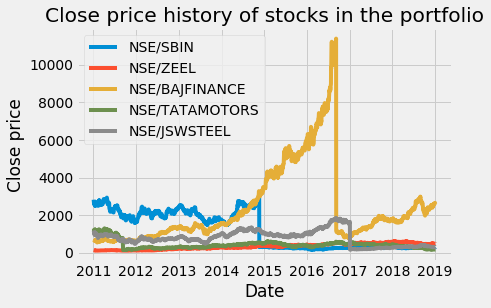

In [8]:
#Visulaizing the stock portfolio

title = 'Close price history of stocks in the portfolio'

#Get the securities
stock_portfolio = df

#plot the graph
for j in  stock_portfolio.columns.values:
    plt.plot(stock_portfolio[j],label = j)

plt.title(title)
plt.legend(stock_portfolio.columns.values,loc = 'upper left')
plt. xlabel('Date', fontsize = 17)
plt.ylabel('Close price',fontsize = 17)
plt.show()

In [9]:
#Daily returns 
returns  = df.pct_change()[1:]
returns

,NSE/SBIN,NSE/ZEEL,NSE/BAJFINANCE,NSE/TATAMOTORS,NSE/JSWSTEEL
Date,,,,,
2019-01-03,-0.022006,-0.005389,0.003940,-0.028663,-0.018406
2019-01-02,0.009619,0.019070,0.010769,0.015056,0.021405
2019-01-01,0.019394,0.021265,0.016373,0.029071,0.052823
2018-12-31,-0.012350,-0.007913,-0.004404,-0.004324,0.009212
2018-12-28,-0.003717,-0.004198,-0.003913,-0.010712,-0.028199
...,...,...,...,...,...
2011-01-07,0.021142,0.012706,0.024619,0.011473,0.044786
2011-01-06,0.008247,0.016974,0.044114,0.059486,0.067576
2011-01-05,0.026998,0.018868,0.012704,0.017288,0.043609


In [10]:
#Showing the annualized covariamce matrix
Annual_cov_matrix = returns.cov()*252
Annual_cov_matrix

,NSE/SBIN,NSE/ZEEL,NSE/BAJFINANCE,NSE/TATAMOTORS,NSE/JSWSTEEL
NSE/SBIN,9.934759,0.065995,-0.009035,0.079841,0.053199
NSE/ZEEL,0.065995,0.089896,0.015121,0.044698,0.027793
NSE/BAJFINANCE,-0.009035,0.015121,9.947786,0.041505,0.049250
NSE/TATAMOTORS,0.079841,0.044698,0.041505,2.403869,0.061974
NSE/JSWSTEEL,0.053199,0.027793,0.049250,0.061974,10.622413


In [11]:
#Calculate the portfolio variance 
port_variance = np.dot(weights.T, np.dot(Annual_cov_matrix, weights))
port_variance

1.3543762889018414

In [12]:
#Calculating standard deviation
import math
portfolio_vol = math.sqrt(port_variance)
portfolio_vol

1.163776734989079

In [13]:
#Calculate the annual portfollio return 
portfolio_annual_ret = np.sum(returns.mean()*weights)*252
portfolio_annual_ret

0.7091016360693526

In [14]:
#predicted Annual return, volatility and variance

variance_percentage = str(round(port_variance,2)*100)+'%'
volatility_percentage = str(round(portfolio_vol,2)*100)+'%'
percentage_return = str(round(portfolio_annual_ret,2)*100)+'%'

print("Variance : ",variance_percentage)
print("volatility : ",volatility_percentage)
print("return : ",percentage_return)


Variance :  135.0%
volatility :  115.99999999999999%
return :  71.0%


In [ ]:
pip install PyPortfolioOpt

In [16]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

Note: you may need to restart the kernel to use updated packages.


'C:\Users\JAYACHANDRAN' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df) #Get the sample covariance matrix

In [ ]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) # the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

In [ ]:
pip install pulp

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

In [2]:
latex

NameError: name 'latex' is not defined